# Housing Price Prediction



## Problem Statement

#### The dataset provided contains information about different properties in Boston. The goal of this project is to develop a model that can predict the median value of owner-occupied homes (MEDV) based on various features.

About the Dataset

Housing prices are an important reflection of the economy, and housing price ranges are of great interest for both buyers and sellers. In this project, house prices will be predicted given explanatory variables that cover many aspects of residential houses. The goal of this project is to create a regression model that is able to accurately estimate the price of the house given the features.

1.CRIM per capital crime rate by town

2.ZN proportion of residential land zoned for lots over 25,000 sq.ft.

3.INDUS proportion of non-retail business acres per town

4.CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5.NOX nitric oxides concentration (parts per 10 million)

6.RM average number of rooms per dwelling

7.AGE proportion of owner-occupied units built prior to 1940

8.DIS weighted distances to five Boston employment centers

9.RAD index of accessibility to radial highways

10.TAX full-value property-tax rate per 10,000 USD

11.PTRATIO pupil-teacher ratio by town

12.Black 1000(Bk — 0.63)² where Bk is the proportion of blacks by town

13.LSTAT % lower status of the population

14.MEDV : Median value of owner-occupied homes in $1000's.

In [1]:
# importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
boston_df = pd.read_csv('Housing.csv')

In [3]:
# Displaying the dataset
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1.0,273,21.0,391.99,9.67,22.4
505,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1.0,273,21.0,396.90,9.08,20.6
506,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1.0,273,21.0,396.90,5.64,23.9
507,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273,21.0,393.45,6.48,22.0


We have 509 rows and 14 columns in this dataset.

In [4]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2


In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     509 non-null    float64
 1   ZN       509 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     509 non-null    int64  
 4   NOX      507 non-null    float64
 5   RM       509 non-null    float64
 6   AGE      508 non-null    float64
 7   DIS      509 non-null    float64
 8   RAD      508 non-null    float64
 9   TAX      509 non-null    int64  
 10  PTRATIO  509 non-null    float64
 11  B        509 non-null    float64
 12  LSTAT    508 non-null    float64
 13  MEDV     509 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.8 KB


In [6]:
boston_df.shape

(509, 14)

In [7]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,509.000000,509.000000,506.000000,509.000000,507.000000,509.000000,508.000000,509.000000,508.000000,509.000000,509.000000,509.000000,508.000000,509.000000
mean,3.707516,11.296660,11.198281,0.068762,0.555216,6.279845,68.579134,3.787705,9.610236,409.216110,18.463851,356.664892,12.705276,22.501572
std,8.732089,23.269781,6.856713,0.253298,0.115633,0.703449,28.114744,2.101852,8.735069,168.814161,2.161553,91.562469,7.131979,9.183497
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.880000,45.075000,2.100700,4.000000,279.000000,17.400000,375.330000,7.092500,17.000000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.202000,77.150000,3.182700,5.000000,330.000000,19.100000,391.450000,11.430000,21.200000
75%,3.693110,12.500000,18.100000,0.000000,0.624000,6.619000,94.100000,5.118000,24.000000,666.000000,20.200000,396.240000,16.992500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
#checking for the null values in dataframe
boston_df.isnull().sum()


CRIM       0
ZN         0
INDUS      3
CHAS       0
NOX        2
RM         0
AGE        1
DIS        0
RAD        1
TAX        0
PTRATIO    0
B          0
LSTAT      1
MEDV       0
dtype: int64

We use .isnull and add them to know if there any null values in our dataframe.

### Here we have null values but in very less places, so I filled them by using mean method. 

In [10]:
data = boston_df.fillna(boston_df.mean())

In [11]:
data.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
# Checking for duplicate values
data.duplicated().sum()

4

In [13]:

# Remove duplicates
data = data.drop_duplicates()

if len(data) == len(data):
    print("No duplicate values in the dataset after removal.")
data

No duplicate values in the dataset after removal.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1.0,273,21.0,391.99,9.67,22.4
505,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1.0,273,21.0,396.90,9.08,20.6
506,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1.0,273,21.0,396.90,5.64,23.9
507,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273,21.0,393.45,6.48,22.0


We got 505 rows after removing duplicate values 

# EDA Techniques

## Univariate Analysis

### Histogram for 'CRIM', 'NOX', 'RM', 'AGE', 'MEDV'.

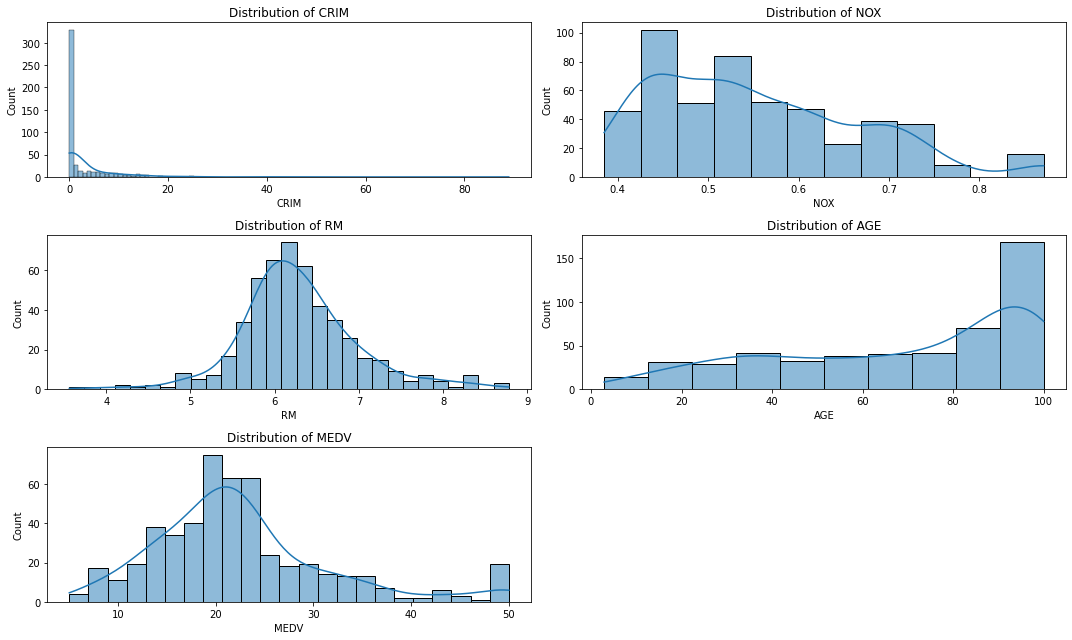

In [14]:
selected_features = ['CRIM', 'NOX', 'RM', 'AGE', 'MEDV']
num_features = len(selected_features)

num_cols = 2
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

axes = axes.flatten()

for i, feature in enumerate(selected_features):
    sns.histplot(data[feature], ax=axes[i], kde=True)  
    axes[i].set_title(f'Distribution of {feature}')

for j in range(num_features, num_rows*num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The histograms provide insights into the distributions of the selected features within the dataset.

From the KDE lines, you can observe the general shape and smoothness of each distribution, indicating the density of data points across different ranges of each feature.

These visualizations help in understanding the central tendency, spread, and skewness of each feature's distribution, which can be crucial for further analysis and decision-making in this project.

### Calculate and print mean,median,mode, minimum and maximum values for each feature


In [15]:
mean_values = data.mean()
print("Mean values for each feature:")
print(mean_values)

median_values = data.median()
print("\nMedian values for each feature:")
print(median_values)

mode_values = data.mode().iloc[0]  
print("\nMode values for each feature:")
print(mode_values)

min_values = data.min()
print("\nMinimum values for each feature:")
print(min_values)

max_values = data.max()
print("\nMaximum values for each feature:")
print(max_values)



Mean values for each feature:
CRIM         3.606091
ZN          11.386139
INDUS       11.160267
CHAS         0.069307
NOX          0.554747
RM           6.284816
AGE         68.517186
DIS          3.798725
RAD          9.531901
TAX        407.726733
PTRATIO     18.452079
B          357.188772
LSTAT       12.656743
MEDV        22.555644
dtype: float64

Median values for each feature:
CRIM         0.25387
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20900
AGE         77.00000
DIS          3.21570
RAD          5.00000
TAX        330.00000
PTRATIO     19.00000
B          391.45000
LSTAT       11.38000
MEDV        21.20000
dtype: float64

Mode values for each feature:
CRIM         0.01501
ZN           0.00000
INDUS       18.10000
CHAS         0.00000
NOX          0.53800
RM           5.71300
AGE        100.00000
DIS          3.49520
RAD         24.00000
TAX        666.00000
PTRATIO     20.20000
B          396.90000
LSTAT        6.36000
M

It gives an idea of the typical value for each feature, useful for understanding their overall magnitude,gives insight into the central position,helps identify the most common values,lower and upper bound and revealing the range of values and showing the maximum extent of variation respectively.

### Showing 'CHAS' value counts by using value counts and bar plot

In [16]:
chas_counts = data['CHAS'].value_counts()

chas_counts


0    470
1     35
Name: CHAS, dtype: int64

### Bar Plot plotting the value counts of 'CHAS"

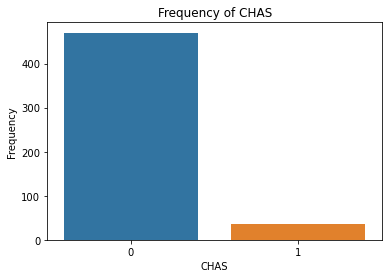

In [17]:

sns.countplot(data=data, x='CHAS')

plt.title('Frequency of CHAS')
plt.xlabel('CHAS')
plt.ylabel('Frequency')

plt.show()


The value counts provide a numeric summary of the distribution of values in the 'CHAS' column, while the seaborn bar plot offers a visual representation, making it easier to grasp the relative frequencies of different values.

## Bivariate Analysis

### Scatter plot of 'RM' and 'MEDV'.

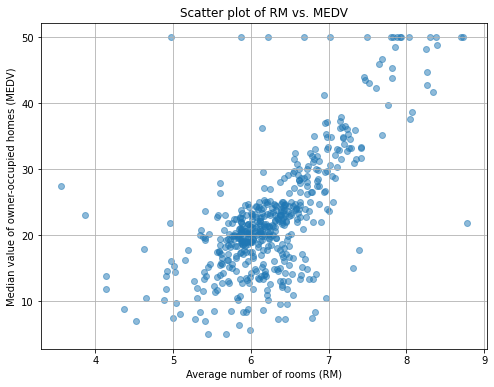

In [18]:

plt.figure(figsize=(8, 6))
plt.scatter(data['RM'], data['MEDV'], alpha=0.5)
plt.title('Scatter plot of RM vs. MEDV')
plt.xlabel('Average number of rooms (RM)')
plt.ylabel('Median value of owner-occupied homes (MEDV)')
plt.grid(True)
plt.show()


A scatter plot of 'RM' (average number of rooms) vs. 'MEDV' (median house price) helps identify any linear relationship or pattern between these two continuous variables. For example, we can observe if there's a trend where houses with more rooms tend to have higher median prices.

Here by observing the scatter plot, you can assess the relationship between the average number of rooms and the median house price.
Typically, in real estate, there might be a positive correlation between the number of rooms in a house and its price. As the number of rooms increases, the house price might also increase.

### Pair plot for numerical variables like 'CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'MEDV'.

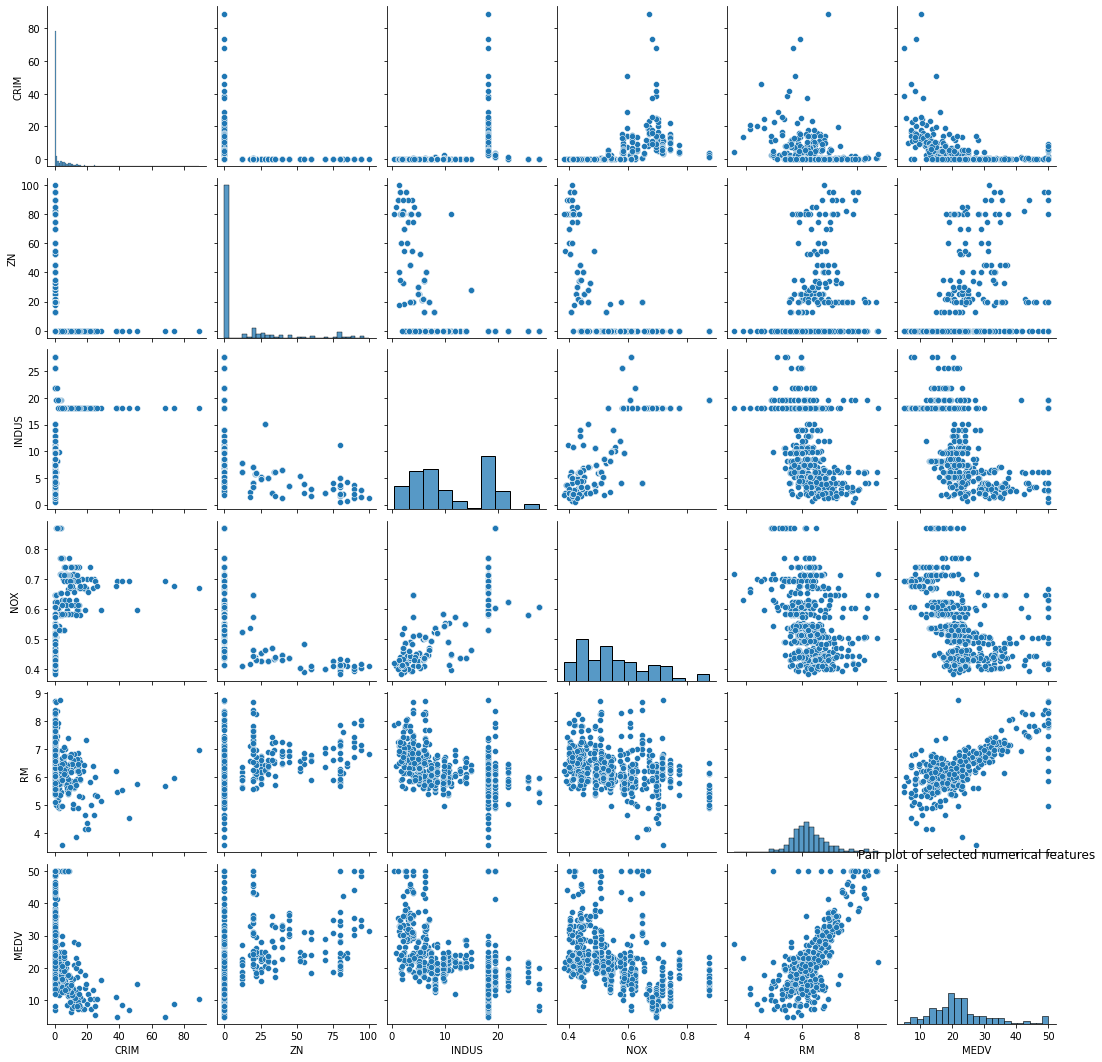

In [19]:
#import seaborn as sns

selected_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'MEDV']  
sns.pairplot(data[selected_features])
plt.title('Pair plot of selected numerical features')
plt.show()

A pair plot visualizes pairwise relationships between multiple numerical variables in the dataset. Each scatter plot in the pair plot matrix shows the relationship between two variables. This helps identify potential correlations or trends between different features, allowing for a comprehensive exploration of the dataset.

### Box plot for 'CHAS and 'MEDV'.

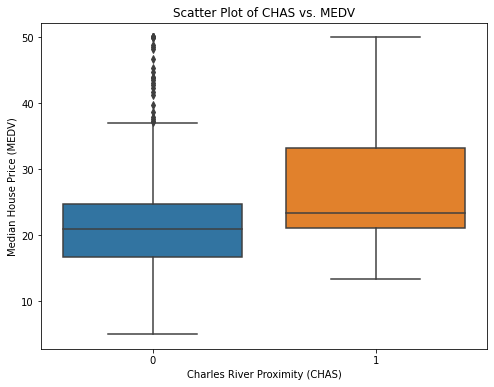

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='CHAS', y='MEDV')
plt.title('Scatter Plot of CHAS vs. MEDV')
plt.xlabel('Charles River Proximity (CHAS)')
plt.ylabel('Median House Price (MEDV)')
plt.show()


The box plot visualizes the distribution of median house prices ('MEDV') across two categories of Charles River proximity ('CHAS'). Each data point in the plot represents the median house price of a property, with properties near the Charles River (CHAS=1) depicted on one side of the plot, and those farther away (CHAS=0) on the other side.



## Multivariate Analysis

### 3D Scatter plot of 'RM, 'AGE' and 'MEDV' with 'CHAS'.

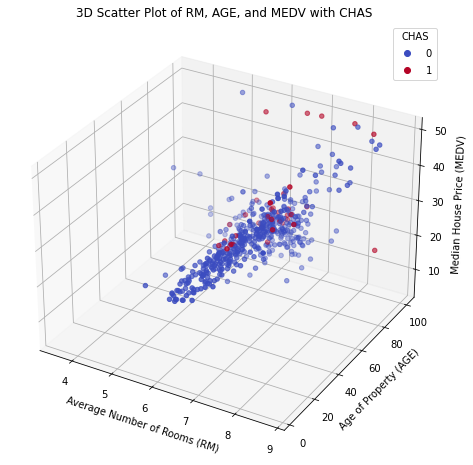

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data['RM'], data['AGE'], data['MEDV'], c=data['CHAS'], cmap='coolwarm')
ax.set_xlabel('Average Number of Rooms (RM)')
ax.set_ylabel('Age of Property (AGE)')
ax.set_zlabel('Median House Price (MEDV)')
plt.title('3D Scatter Plot of RM, AGE, and MEDV with CHAS')
plt.legend(*scatter.legend_elements(), title='CHAS')

plt.show()


A 3D scatter plot visualizes relationships between three numerical variables simultaneously. In this plot, each point represents a property, with its position in 3D space determined by the values of 'RM' (average number of rooms), 'AGE' (age of the property), and 'MEDV' (median house price). Points are colored based on the value of the binary variable 'CHAS', providing insight into how proximity to the Charles River influences these relationships.

### Relationship between RM, AGE, and MEDV:
Observing the distribution of points in 3D space, you might notice certain patterns or clusters.
For example, there could be a cluster of points with higher 'RM' values (indicating more rooms), lower 'AGE' values (indicating newer properties), and higher 'Price' values (indicating higher house prices), suggesting a positive correlation between these variables.

### Stacked bar plot of 'MEDV'' by 'CHAS'.

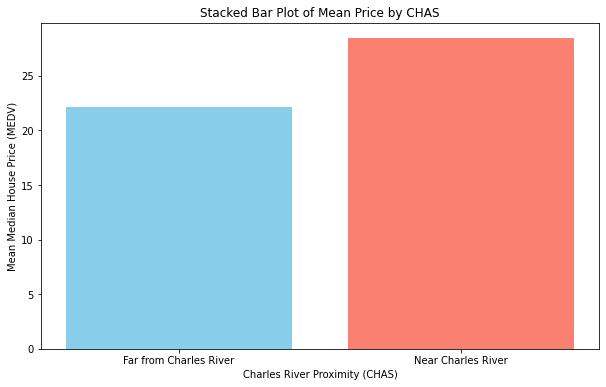

In [22]:
plt.figure(figsize=(10, 6))

mean_Price_by_chas = data.groupby('CHAS')['MEDV'].mean().reset_index()

plt.bar(mean_Price_by_chas['CHAS'], mean_Price_by_chas['MEDV'], color=['skyblue', 'salmon'])
plt.title('Stacked Bar Plot of Mean Price by CHAS')
plt.xlabel('Charles River Proximity (CHAS)')
plt.ylabel('Mean Median House Price (MEDV)')
plt.xticks(mean_Price_by_chas['CHAS'], ['Far from Charles River', 'Near Charles River'])

plt.show()



The bars are color-coded to represent the two categories of proximity to the Charles River. Blue typically indicates properties far from the river ('CHAS = 0'), while salmon color represents properties near the river ('CHAS = 1').

Bar Heights:
Each bar's height represents the mean median house price for properties in the respective category of river proximity.
The taller the bar, the higher the average median house price for properties in that category.

## Outlier Detection

### Box plot of features with feature values

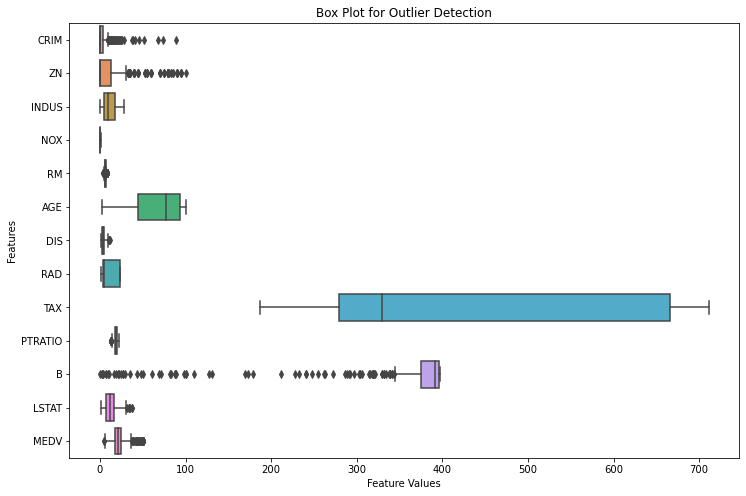

In [23]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop(columns=['CHAS']), orient='h')
plt.title('Box Plot for Outlier Detection')
plt.xlabel('Feature Values')
plt.ylabel('Features')
plt.show()


This horizontal box plot visualizes the distribution of feature values in the dataset, excluding the 'CHAS' column.
It assists in identifying potential outliers and understanding the spread and central tendency of each feature